In [233]:
from pyspark.sql import SparkSession #Import the pyspark
from pyspark.conf import SparkConf #Import the SparkConf
from pyspark.context import SparkContext #Import the SparkContext
import time

In [234]:
#initializing and starting a pyspark session

conf = SparkConf()
conf.setMaster("local").setAppName("word-counts") 
# sc = SparkContext(conf=conf1) #The spark context object is assigned to a variable sc.
sc = SparkContext.getOrCreate(conf=conf)

In [235]:
sc


<SparkContext master=local appName=word-counts>

# Q 1.1

In [238]:
#1.1
#reading all the words in the text file and making a list of tupples including words and their counts
lines = sc.textFile("JaneAusten.txt") #The file is read using the textFile() method.
word_counts = lines.flatMap(lambda line: line.split(' '))\
                   .map(lambda word: (word,1)) \
                   .reduceByKey(lambda count1, count2: count1 + count2) \
                   .collect() 


c = 0

#counting all the words
for (word,count) in word_counts[0:]:
#     print(word,count)
    c += count
    
print("count = ",c)

c = 0

#counting words except for space(" ") 
for (word,count) in word_counts[1:]:
#     print(word,count)
    c += count
    
print("count words except for space = ",c)


count =  797474
count words except for space =  780223


In [239]:
word_counts[:]

[('', 17251),
 ('Project', 81),
 ("Gutenberg's", 1),
 ('The', 1663),
 ('Complete', 3),
 ('Works', 3),
 ('of', 22761),
 ('Jane', 374),
 ('Austen,', 6),
 ('by', 3766),
 ('Austen', 27),
 ('This', 358),
 ('eBook', 5),
 ('is', 4932),
 ('for', 6703),
 ('the', 26654),
 ('use', 139),
 ('anyone', 34),
 ('anywhere', 19),
 ('at', 4835),
 ('no', 2686),
 ('cost', 27),
 ('and', 22184),
 ('with', 6070),
 ('almost', 480),
 ('restrictions', 7),
 ('whatsoever.', 2),
 ('You', 691),
 ('may', 1040),
 ('copy', 10),
 ('it,', 796),
 ('give', 667),
 ('it', 6800),
 ('away', 393),
 ('or', 2373),
 ('re-use', 2),
 ('under', 296),
 ('terms', 72),
 ('Gutenberg', 23),
 ('License', 8),
 ('included', 14),
 ('this', 1992),
 ('online', 4),
 ('www.gutenberg.org', 2),
 ('Title:', 1),
 ('Author:', 1),
 ('Editor:', 1),
 ('David', 3),
 ('Widger', 3),
 ('Release', 1),
 ('Date:', 1),
 ('January', 4),
 ('25,', 1),
 ('2010', 1),
 ('[EBook', 1),
 ('#31100]', 1),
 ('Language:', 1),
 ('English', 16),
 ('Character', 6),
 ('set', 246)

# Q 1.2

In [94]:
#1.2

lines = sc.textFile("JaneAusten.txt") #The file is read using the textFile() method.

words_rdd = lines.flatMap(lambda line: line.split(' '))

distinct_words_counts = words_rdd.distinct() #The unique words can be found by invoking the distinct() function on the rdd.


count = distinct_words_counts.count() #The count of unique words is obtained by invoking the count() function.

print("The count of unique words in the file is:", count)

The count of unique words in the file is: 44360


# Q 1.3

In [63]:
#1.3
#sorting files based on their counts and showing top 10
sort = sorted(word_counts,key=lambda l:l[1], reverse=True)
sort[:10]


[('the', 26654),
 ('to', 25322),
 ('of', 22761),
 ('and', 22184),
 ('', 17251),
 ('a', 13772),
 ('I', 11686),
 ('in', 11523),
 ('her', 11427),
 ('was', 11342)]

In [185]:
#changing the number of processors for exprimenting the process time
t = 0
T = []
num_cores= [ 1,2,3,4]
for i in num_cores:
    conf = SparkConf()
    conf.setMaster(f"local[{i}]").setAppName("word-counts")   # set the number of cores
    sc = SparkContext.getOrCreate(conf=conf) #The spark context object is assigned to a variable sc.
    print(conf.getAll())

    t = time.time()

    lines = sc.textFile("JaneAusten.txt") #The file is read using the textFile() method.

    words_rdd = lines.flatMap(lambda line: line.split(' '))

    distinct_words_counts = words_rdd.distinct() #The unique words can be found by invoking the distinct() function on the rdd.


    count = distinct_words_counts.count() #The count of unique words is obtained by invoking the count() function.

    print("core:",i)
    
    print(time.time() - t)
    T.append(time.time() - t)
    

    print("The count of unique words in the file is:", count)
    
T

[('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.app.submitTime', '1672598316727'), ('spark.ui.showConsoleProgress', 'true'), ('spark.master', 'local[1]')]


core: 1
2.042257070541382
The count of unique words in the file is: 44360
[('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.app.submitTime', '1672598316727'), ('spark.ui.showConsoleProgress', 'true'), ('spark.master', 'local[2]')]


core: 2
1.5026111602783203
The count of unique words in the file is: 44360
[('spark.master', 'local[3]'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.app.submitTime', '1672598316727'), ('spark.ui.showConsoleProgress', 'true')]


core: 3
1.3745746612548828
The count of unique words in the file is: 44360
[('spark.master', 'local[4]'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.app.submitTime', '1672598316727'), ('spark.ui.showConsoleProgress', 'true')]


core: 4
1.3995206356048584
The count of unique words in the file is: 44360


[2.0422825813293457,
 1.5026342868804932,
 1.3745982646942139,
 1.3995444774627686]

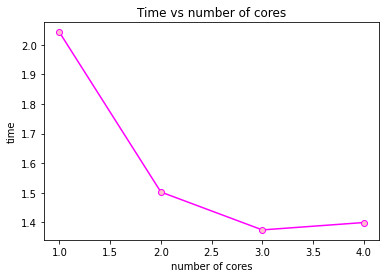

In [189]:
import matplotlib.pyplot as plt

plt.plot(num_cores,T, color='magenta', marker='o',mfc='pink' ) #plot the data

plt.ylabel('time') #set the label for y axis
plt.xlabel('number of cores') #set the label for x-axis
plt.title("Time vs number of cores") #set the title of the graph
plt.show() #display the graph
plt.savefig("Time vs number of cores.png")


# Q 2

### C1 Text file

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from sklearn.datasets.samples_generator import make_blobs
from pyspark import SparkContext
from pyspark.ml.clustering import KMeans, BisectingKMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession #Import the pyspark
from pyspark.conf import SparkConf #Import the SparkConf
from pyspark.context import SparkContext #Import the SparkContext
import time

### Q 2.1

In [4]:
#2.1
#initializing and starting a pyspark session

conf = SparkConf()
conf.setMaster("local").setAppName("word-counts") 

sc = SparkContext.getOrCreate(conf=conf)

df1 = sc.textFile("C1.txt") #The file is read using the textFile() method.


23/01/02 11:53:44 WARN Utils: Your hostname, ERFAN resolves to a loopback address: 127.0.1.1; using 172.27.90.33 instead (on interface eth0)
23/01/02 11:53:44 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


23/01/02 11:53:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### if you have already run these cells, you can skip this section

In [193]:
#  save the numbers in columns of dataframe as lists
L1 = []
L2 = []
for i in range(df1.count()):
    L1.append(df1.collect()[i][4:10])
    L2.append(df1.collect()[i][14:20])
    
print(L1[:5])

['624474', '673412', '647442', '532283', '646529']


In [195]:
# making a pandas dataframe using the lists
C1_list = pd.DataFrame(
    {'X': L1,
     'Y': L2
    })

# save the dataframe as a csv file
C1_list.to_csv('C1_pd.csv', index=False)

# loading the dataframe

In [168]:
sqlContext = SQLContext(sc)


/home/erfan_wsl/.local/lib/python3.10/site-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [169]:
FEATURES_COL = ['X', 'Y']
path = 'C1_pd.csv'

In [170]:
# reading csv file as pyspark dataframe
df = sqlContext.read.csv(path, header=True) 
df.show()

+------+------+
|     X|     Y|
+------+------+
|624474|837604|
|673412|735362|
|647442|677000|
|532283|741384|
|646529|742844|
|647535|755101|
|644131|777721|
|521368|736923|
|688940|798967|
|592666|805244|
|645068|716248|
|666740|707391|
|662064|644958|
|630628|689662|
|623268|774834|
|617896|766560|
|560260|629298|
|595728|703618|
|594177|665266|
|544862|802997|
+------+------+
only showing top 20 rows



In [171]:
# change type of values from string to float
df_feat = df.select(*(df[c].cast("float").alias(c) for c in df.columns[:]))
df_feat.show()

+--------+--------+
|       X|       Y|
+--------+--------+
|624474.0|837604.0|
|673412.0|735362.0|
|647442.0|677000.0|
|532283.0|741384.0|
|646529.0|742844.0|
|647535.0|755101.0|
|644131.0|777721.0|
|521368.0|736923.0|
|688940.0|798967.0|
|592666.0|805244.0|
|645068.0|716248.0|
|666740.0|707391.0|
|662064.0|644958.0|
|630628.0|689662.0|
|623268.0|774834.0|
|617896.0|766560.0|
|560260.0|629298.0|
|595728.0|703618.0|
|594177.0|665266.0|
|544862.0|802997.0|
+--------+--------+
only showing top 20 rows



In [172]:
#adding a features column which contains all the columns as a single list

vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
# choosing just the features column for a new dataframe
df_kmeans = vecAssembler.transform(df_feat).select('features')
df_kmeans.show()

+-------------------+
|           features|
+-------------------+
|[624474.0,837604.0]|
|[673412.0,735362.0]|
|[647442.0,677000.0]|
|[532283.0,741384.0]|
|[646529.0,742844.0]|
|[647535.0,755101.0]|
|[644131.0,777721.0]|
|[521368.0,736923.0]|
|[688940.0,798967.0]|
|[592666.0,805244.0]|
|[645068.0,716248.0]|
|[666740.0,707391.0]|
|[662064.0,644958.0]|
|[630628.0,689662.0]|
|[623268.0,774834.0]|
|[617896.0,766560.0]|
|[560260.0,629298.0]|
|[595728.0,703618.0]|
|[594177.0,665266.0]|
|[544862.0,802997.0]|
+-------------------+
only showing top 20 rows



In [201]:
# from pyspark.ml.evaluation import ClusteringEvaluator
# cost = np.zeros(25)
# for k in range(2,25):
#     kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
#     model = kmeans.fit(df_kmeans.sample(False,0.1, seed=42))
# #     cost[k] = model.computeCost(df_kmeans) # requires Spark 2.0 or later
#     pdt = model.transform(df_kmeans)
#     evaluator = ClusteringEvaluator()
#     cost[k] = evaluator.evaluate(pdt)

In [205]:
# from pyspark.ml.evaluation import ClusteringEvaluator
# cost = np.zeros(25)
# for k in range(2,25):
#     kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
# #     model = kmeans.fit(df_kmeans.sample(False,0.1, seed=42))
#     model = kmeans.fit(df_kmeans)
#     cost[k] = model.summary.trainingCost



# Kmeans++

In [173]:
# training a kmeans ++ (initMode='k-means||') model on the dataframe extracted from the text file
# evaluating using Silhouette methode
from pyspark.ml.evaluation import ClusteringEvaluator
cost = np.zeros(25)
for k in range(2,25):
    kmeans = KMeans(initMode='k-means||').setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans)

    pdt = model.transform(df_kmeans)
    evaluator = ClusteringEvaluator()
    cost[k] = evaluator.evaluate(pdt) #Silhouette with squared euclidean distance
    

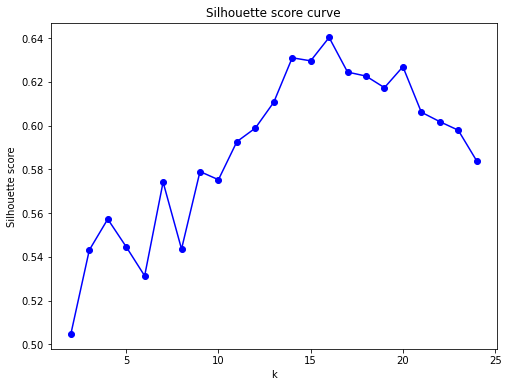

In [174]:
# ploting Silhouette score vs number of clusters(k)
# the maximum shows the optimal k for the kmeans model
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,25),cost[2:25],"bo-")
ax.set_xlabel('k')
ax.set_ylabel('Silhouette score')
ax.set_title("Silhouette score curve")
plt.savefig("Silhouette score curve.png")

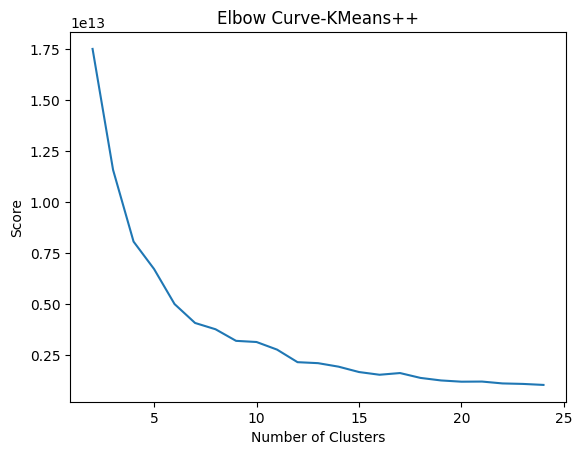

In [19]:
# training a kmeans ++ (initMode='k-means||') model on the dataframe extracted from the text file
# evaluating using Elbow methode
cost = np.zeros(25)
for k in range(2,25):
    kmeans = KMeans(initMode='k-means||').setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans)    
    cost[k] = model.summary.trainingCost

    
# ploting Silhouette score vs number of clusters(k)
# the elbow shows the optimal k for the kmeans model

plt.plot(range(2,25),cost[2:25])
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve-KMeans++')
plt.savefig("Elbow Curve_c1.png")    


### Q 2.2 and Q2.3 kmeans

In [175]:
# choosing the optimal number of clusters then training the kmeans++ model and showing the centroids of them
k = cost.argmax()
print("best k for clustering: ", k)
kmeans = KMeans(initMode='k-means||').setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

best k for clustering:  16
Cluster Centers: 
[738928.3238342  430720.18393782]
[508472.61237785 219457.78501629]
[289311.39145907 703451.08540925]
[458746.55401662 642691.57617729]
[245168.32397959 493590.78571429]
[383938.31740614 363885.19453925]
[389803.93859649 511164.44736842]
[498527.15755627 778321.        ]
[199636.85714286 314493.9047619 ]
[541997.53313253 386822.64759036]
[661783.55952381 263828.71130952]
[650725.57931034 756255.30344828]
[768162.48504983 576619.66445183]
[623400.07713499 621188.47658402]
[297558.31476323 276901.95821727]
[546289.03289474 517146.85197368]


### Q 2.4 kmeans

In [211]:
#changing the number of processors for exprimenting the process time of kmeans++ training

T=[]

print("best k for clustering: ", k)

num_cores= [ 1,2,3,4]
for i in num_cores:
    
    conf = SparkConf()
    conf.setMaster(f"local[{i}]").setAppName("word-counts")   # set the number of cores
    sc = SparkContext.getOrCreate(conf=conf) #The spark context object is assigned to a variable sc.
    print(conf.getAll())

    t = time.time()
    kmeans = KMeans(initMode='k-means||').setK(k).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans)
    print(time.time() - t)
    T.append(time.time() - t)


best k for clustering:  16
[('spark.app.submitTime', '1672647824991'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true'), ('spark.master', 'local[1]')]
1.5731873512268066
[('spark.app.submitTime', '1672647824991'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true'), ('spark.master', 'local[2]')]
1.3014400005340576
[('spark.app.submitTime', '1672647824991'), ('spark.master', 'local[3]'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true')]
1.1812496185302734
[('spark.app.submitTime', '1672647824991'), ('spark.master', 'local[4]'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true')]
1.2570278644561768


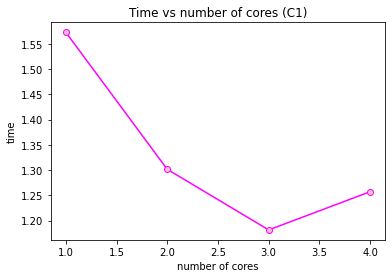

<Figure size 432x288 with 0 Axes>

In [213]:

import matplotlib.pyplot as plt

plt.plot(num_cores,T, color='magenta', marker='o',mfc='pink' ) #plot the data

plt.ylabel('time') #set the label for y axis
plt.xlabel('number of cores') #set the label for x-axis
plt.title("Time vs number of cores (C1)") #set the title of the graph
plt.show() #display the graph
plt.savefig("Time vs number of cores_C1.png")


# BisectingKMeans

In [214]:
# training a BisectingKMeans model on the dataframe extracted from the text file
# evaluating using Silhouette methode
from pyspark.ml.evaluation import ClusteringEvaluator
cost = np.zeros(25)
for k in range(2,25):
    bkm = BisectingKMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = bkm.fit(df_kmeans)

    pdt = model.transform(df_kmeans)
    evaluator = ClusteringEvaluator()
    cost[k] = evaluator.evaluate(pdt) #Silhouette with squared euclidean distance
    

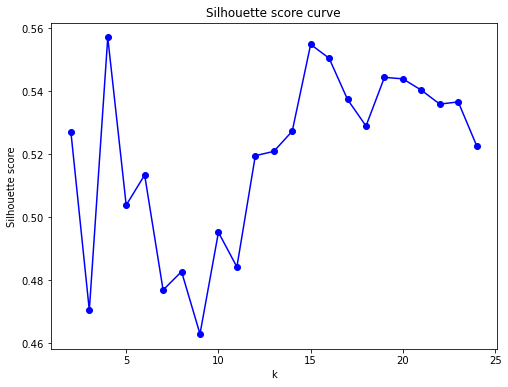

In [215]:
# ploting Silhouette score vs number of clusters(k)
# the maximum shows the optimal k for the BisectingKMeans model
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,25),cost[2:25],"bo-")
ax.set_xlabel('k')
ax.set_ylabel('Silhouette score')
ax.set_title("Silhouette score curve")
plt.savefig("Silhouette score curve BisectingKMeans.png")

### Q 2.2 and Q2.3 BisectingKMeans

In [216]:
# choosing the optimal number of clusters then training the kmeans++ model and showing the centroids of them

k = cost.argmax()
print("best k for clustering: ", k)
bkm = BisectingKMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = bkm.fit(df_kmeans)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

best k for clustering:  4
Cluster Centers: 
[314877.29136691 413308.13956835]
[568247.25367287 294112.2575906 ]
[479203.43018336 696878.19252468]
[698223.69769428 531685.30401366]


### Q 2.4 BisectingKMeans

In [229]:
#changing the number of processors for exprimenting the process time of kmeans++ training

T=[] ### Q 2.4 kmeans

print("best k for clustering: ", k)

num_cores= [ 1,2,3,4]
for i in num_cores:
    
    conf = SparkConf()
    conf.setMaster(f"local[{i}]").setAppName("word-counts")   # set the number of cores
    sc = SparkContext.getOrCreate(conf=conf) #The spark context object is assigned to a variable sc.
    print(conf.getAll())

    t = time.time()
    bkm = BisectingKMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = bkm.fit(df_kmeans)

    print(time.time() - t)
    T.append(time.time() - t)



best k for clustering:  4
[('spark.app.submitTime', '1672647824991'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true'), ('spark.master', 'local[1]')]
3.359760284423828
[('spark.app.submitTime', '1672647824991'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true'), ('spark.master', 'local[2]')]
3.083700656890869
[('spark.app.submitTime', '1672647824991'), ('spark.master', 'local[3]'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true')]
2.4359402656555176
[('spark.app.submitTime', '1672647824991'), ('spark.master', 'local[4]'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true')]
2.309162139892578


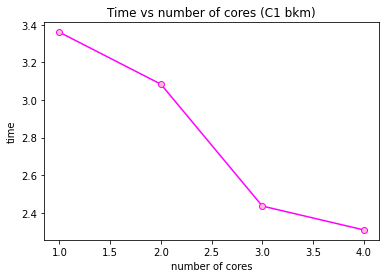

<Figure size 432x288 with 0 Axes>

In [232]:
import matplotlib.pyplot as plt

plt.plot(num_cores,T, color='magenta', marker='o',mfc='pink' ) #plot the data

plt.ylabel('time') #set the label for y axis
plt.xlabel('number of cores') #set the label for x-axis
plt.title("Time vs number of cores (C1 bkm)") #set the title of the graph
plt.show() #display the graph
plt.savefig("Time vs number of cores_C1_bkm.png")


### C2 Text file (process is just like the one for C1 Text file so all comments can be repeated)

### if you have already run these cells, you can skip this section

In [3]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# # from sklearn.datasets.samples_generator import make_blobs
# from pyspark import SparkContext
# from pyspark.ml.clustering import KMeans, BisectingKMeans
# from pyspark.ml.feature import VectorAssembler
# from pyspark.sql import SQLContext
# from pyspark.sql import SparkSession #Import the pyspark
# from pyspark.conf import SparkConf #Import the SparkConf
# from pyspark.context import SparkContext #Import the SparkContext
# import time

In [28]:
#2.1
conf = SparkConf()
conf.setMaster("local").setAppName("word-counts") 
# sc = SparkContext(conf=conf1) #The spark context object is assigned to a variable sc.
sc = SparkContext.getOrCreate(conf=conf)

df2 = sc.textFile("C2.txt") #The file is read using the textFile() method.


#### if you have already run these cells, you can skip this section

In [30]:
L1 = []
L2 = []
for i in range(df2.count()):
    m= df2.collect()[i].find("\t")
    
    L1.append(df2.collect()[i][:m])
    L2.append(df2.collect()[i][m+1:])
    
print(L1[:5])

['15.55', '14.9', '14.45', '14.15', '13.75']


In [31]:
C2_list = pd.DataFrame(
    {'X': L1,
     'Y': L2
    })

# save the ndarray as a csv file
C2_list.to_csv('C2_pd.csv', index=False)

# loading the dataframe

In [157]:
sqlContext = SQLContext(sc)


/home/erfan_wsl/.local/lib/python3.10/site-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [158]:
FEATURES_COL = ['X', 'Y']
path = 'C2_pd.csv'

In [159]:
df = sqlContext.read.csv(path, header=True) # requires spark 2.0
df.show()

+-----+-----+
|    X|    Y|
+-----+-----+
|15.55|28.65|
| 14.9|27.55|
|14.45|28.35|
|14.15| 28.8|
|13.75|28.05|
|13.35|28.45|
|   13|29.15|
|13.45| 27.5|
| 13.6| 26.5|
| 12.8|27.35|
| 12.4|27.85|
| 12.3| 28.4|
| 12.2|28.65|
| 13.4| 25.1|
|12.95|25.95|
| 12.9| 26.5|
|11.85|   27|
|11.35|   28|
|11.15| 28.7|
|11.25| 27.4|
+-----+-----+
only showing top 20 rows



In [160]:
df_feat = df.select(*(df[c].cast("float").alias(c) for c in df.columns[:]))
df_feat.show()

+-----+-----+
|    X|    Y|
+-----+-----+
|15.55|28.65|
| 14.9|27.55|
|14.45|28.35|
|14.15| 28.8|
|13.75|28.05|
|13.35|28.45|
| 13.0|29.15|
|13.45| 27.5|
| 13.6| 26.5|
| 12.8|27.35|
| 12.4|27.85|
| 12.3| 28.4|
| 12.2|28.65|
| 13.4| 25.1|
|12.95|25.95|
| 12.9| 26.5|
|11.85| 27.0|
|11.35| 28.0|
|11.15| 28.7|
|11.25| 27.4|
+-----+-----+
only showing top 20 rows



In [161]:
vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans = vecAssembler.transform(df_feat).select('features')
df_kmeans.show()

+--------------------+
|            features|
+--------------------+
|[15.5500001907348...|
|[14.8999996185302...|
|[14.4499998092651...|
|[14.1499996185302...|
|[13.75,28.0499992...|
|[13.3500003814697...|
|[13.0,29.14999961...|
|[13.4499998092651...|
|[13.6000003814697...|
|[12.8000001907348...|
|[12.3999996185302...|
|[12.3000001907348...|
|[12.1999998092651...|
|[13.3999996185302...|
|[12.9499998092651...|
|[12.8999996185302...|
|[11.8500003814697...|
|[11.3500003814697...|
|[11.1499996185302...|
|[11.25,27.3999996...|
+--------------------+
only showing top 20 rows



# Kmeans++

In [162]:
from pyspark.ml.evaluation import ClusteringEvaluator
cost = np.zeros(25)
for k in range(2,25):
    kmeans = KMeans(initMode='k-means||').setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans)

    pdt = model.transform(df_kmeans)
    evaluator = ClusteringEvaluator()
    cost[k] = evaluator.evaluate(pdt) #Silhouette with squared euclidean distance
    

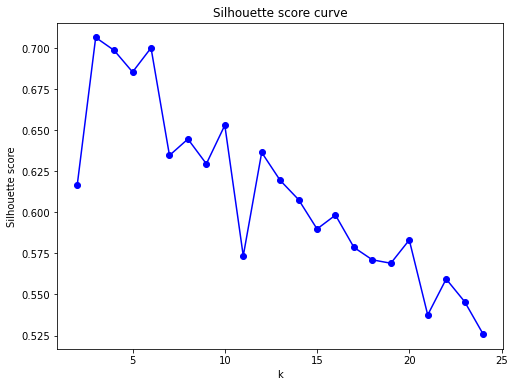

In [163]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,25),cost[2:25],"bo-")
ax.set_xlabel('k')
ax.set_ylabel('Silhouette score')
ax.set_title("Silhouette score curve")
plt.savefig("Silhouette score curve_C2.png")

In [164]:
k = cost.argmax()
print("best k for clustering: ", k)
kmeans = KMeans(initMode='k-means||').setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

best k for clustering:  3
Cluster Centers: 
[15.42522253  7.20756677]
[32.36707314 16.54471542]
[11.01487806 22.77268288]


In [111]:
T=[]
# k = cost.argmax()
print("best k for clustering: ", k)

num_cores= [ 1,2,3,4]
for i in num_cores:
    
    conf = SparkConf()
    conf.setMaster(f"local[{i}]").setAppName("word-counts")   # set the number of cores
    sc = SparkContext.getOrCreate(conf=conf) #The spark context object is assigned to a variable sc.
    print(conf.getAll())

    t = time.time()
    kmeans = KMeans(initMode='k-means||').setK(k).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans)
    # centers = model.clusterCenters()
    print(time.time() - t)
    T.append(time.time() - t)

# print("Cluster Centers: ")
# for center in centers:
#     print(center)

best k for clustering:  3
[('spark.app.submitTime', '1672647824991'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true'), ('spark.master', 'local[1]')]
0.9006755352020264
[('spark.app.submitTime', '1672647824991'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true'), ('spark.master', 'local[2]')]
0.7574799060821533
[('spark.app.submitTime', '1672647824991'), ('spark.master', 'local[3]'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true')]
0.6220803260803223
[('spark.app.submitTime', '1672647824991'), ('spark.master', 'local[4]'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true')]
0.6970460414886475


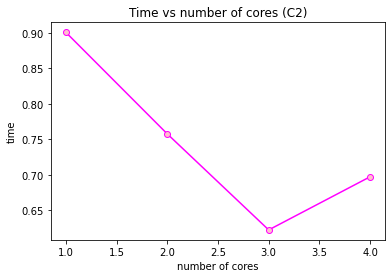

In [116]:
import matplotlib.pyplot as plt

plt.plot(num_cores,T, color='magenta', marker='o',mfc='pink' ) #plot the data

plt.ylabel('time') #set the label for y axis
plt.xlabel('number of cores') #set the label for x-axis
plt.title("Time vs number of cores (C2)") #set the title of the graph
plt.show() #display the graph
# plt.savefig("Time vs number of cores_C2.png")


# BisectingKMeans

In [165]:
from pyspark.ml.evaluation import ClusteringEvaluator
cost = np.zeros(25)
for k in range(2,25):
    bkm = BisectingKMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = bkm.fit(df_kmeans)

    pdt = model.transform(df_kmeans)
    evaluator = ClusteringEvaluator()
    cost[k] = evaluator.evaluate(pdt) #Silhouette with squared euclidean distance
    

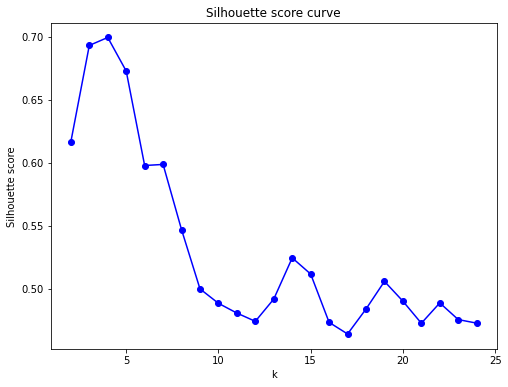

In [166]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,25),cost[2:25],"bo-")
ax.set_xlabel('k')
ax.set_ylabel('Silhouette score')
ax.set_title("Silhouette score curve")
plt.savefig("Silhouette score curve BisectingKMeans_C2.png")

In [167]:
k = cost.argmax()
print("best k for clustering: ", k)
bkm = BisectingKMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = bkm.fit(df_kmeans)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

best k for clustering:  4
Cluster Centers: 
[10.1026316 22.6910526]
[15.33960841  7.17861446]
[32.82247704  8.83119266]
[30.75636939 22.35764325]


In [123]:
T=[]
# k = cost.argmax()
print("best k for clustering: ", k)

num_cores= [ 1,2,3,4]
for i in num_cores:
    
    conf = SparkConf()
    conf.setMaster(f"local[{i}]").setAppName("word-counts")   # set the number of cores
    sc = SparkContext.getOrCreate(conf=conf) #The spark context object is assigned to a variable sc.
    print(conf.getAll())

    t = time.time()
    bkm = BisectingKMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = bkm.fit(df_kmeans)
    # centers = model.clusterCenters()
    print(time.time() - t)
    T.append(time.time() - t)

# print("Cluster Centers: ")
# for center in centers:
#     print(center)

best k for clustering:  4
[('spark.app.submitTime', '1672647824991'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true'), ('spark.master', 'local[1]')]
2.990079641342163
[('spark.app.submitTime', '1672647824991'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true'), ('spark.master', 'local[2]')]
2.3063271045684814
[('spark.app.submitTime', '1672647824991'), ('spark.master', 'local[3]'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true')]
2.251386880874634
[('spark.app.submitTime', '1672647824991'), ('spark.master', 'local[4]'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true')]
2.1762235164642334


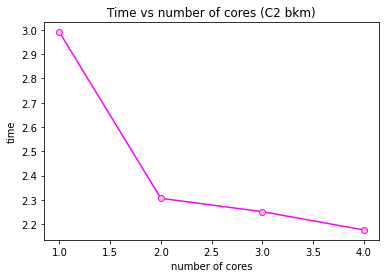

In [126]:
import matplotlib.pyplot as plt

plt.plot(num_cores,T, color='magenta', marker='o',mfc='pink' ) #plot the data

plt.ylabel('time') #set the label for y axis
plt.xlabel('number of cores') #set the label for x-axis
plt.title("Time vs number of cores (C2 bkm)") #set the title of the graph
plt.show() #display the graph
# plt.savefig("Time vs number of cores_C2_bkm.png")


### C3 Text file (process is just like the one for C1 Text file so all comments can be repeated)

### if you have already run these cells, you can skip this section

In [3]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# # from sklearn.datasets.samples_generator import make_blobs
# from pyspark import SparkContext
# from pyspark.ml.clustering import KMeans, BisectingKMeans
# from pyspark.ml.feature import VectorAssembler
# from pyspark.sql import SQLContext
# from pyspark.sql import SparkSession #Import the pyspark
# from pyspark.conf import SparkConf #Import the SparkConf
# from pyspark.context import SparkContext #Import the SparkContext
# import time

In [127]:
#2.1
conf = SparkConf()
conf.setMaster("local").setAppName("word-counts") 
# sc = SparkContext(conf=conf1) #The spark context object is assigned to a variable sc.
sc = SparkContext.getOrCreate(conf=conf)

df3 = sc.textFile("C3.txt") #The file is read using the textFile() method.


#### if you have already run these cells, you can skip this section

In [128]:
L1 = []
L2 = []
for i in range(df3.count()):
    m= df3.collect()[i].find("\t")
    
    L1.append(df3.collect()[i][:m])
    L2.append(df3.collect()[i][m+1:])
    
print(L1[:5])

['31.95', '31.15', '30.45', '29.7', '28.9']


In [129]:
C3_list = pd.DataFrame(
    {'X': L1,
     'Y': L2
    })

# save the ndarray as a csv file
C3_list.to_csv('C3_pd.csv', index=False)

# loading the dataframe

In [130]:
sqlContext = SQLContext(sc)


/home/erfan_wsl/.local/lib/python3.10/site-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [131]:
FEATURES_COL = ['X', 'Y']
path = 'C3_pd.csv'

In [132]:
df = sqlContext.read.csv(path, header=True) # requires spark 2.0
df.show()

+-----+----+
|    X|   Y|
+-----+----+
|31.95|7.95|
|31.15| 7.3|
|30.45|6.65|
| 29.7|   6|
| 28.9|5.55|
|28.05|   5|
| 27.2|4.55|
|26.35|4.15|
| 25.4|3.85|
| 24.6| 3.6|
| 23.6| 3.3|
|22.75|3.15|
|21.85|3.05|
| 20.9|   3|
|   20| 2.9|
| 19.1|   3|
| 18.2| 3.2|
| 17.3|3.25|
|16.55| 3.5|
| 15.7| 3.7|
+-----+----+
only showing top 20 rows



In [133]:
df_feat = df.select(*(df[c].cast("float").alias(c) for c in df.columns[:]))
df_feat.show()

+-----+----+
|    X|   Y|
+-----+----+
|31.95|7.95|
|31.15| 7.3|
|30.45|6.65|
| 29.7| 6.0|
| 28.9|5.55|
|28.05| 5.0|
| 27.2|4.55|
|26.35|4.15|
| 25.4|3.85|
| 24.6| 3.6|
| 23.6| 3.3|
|22.75|3.15|
|21.85|3.05|
| 20.9| 3.0|
| 20.0| 2.9|
| 19.1| 3.0|
| 18.2| 3.2|
| 17.3|3.25|
|16.55| 3.5|
| 15.7| 3.7|
+-----+----+
only showing top 20 rows



In [134]:
vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans = vecAssembler.transform(df_feat).select('features')
df_kmeans.show()

+--------------------+
|            features|
+--------------------+
|[31.9500007629394...|
|[31.1499996185302...|
|[30.4500007629394...|
|[29.7000007629394...|
|[28.8999996185302...|
|[28.0499992370605...|
|[27.2000007629394...|
|[26.3500003814697...|
|[25.3999996185302...|
|[24.6000003814697...|
|[23.6000003814697...|
|[22.75,3.15000009...|
|[21.8500003814697...|
|[20.8999996185302...|
|[20.0,2.900000095...|
|[19.1000003814697...|
|[18.2000007629394...|
|[17.2999992370605...|
|[16.5499992370605...|
|[15.6999998092651...|
+--------------------+
only showing top 20 rows



In [201]:
# from pyspark.ml.evaluation import ClusteringEvaluator
# cost = np.zeros(25)
# for k in range(2,25):
#     kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
#     model = kmeans.fit(df_kmeans.sample(False,0.1, seed=42))
# #     cost[k] = model.computeCost(df_kmeans) # requires Spark 2.0 or later
#     pdt = model.transform(df_kmeans)
#     evaluator = ClusteringEvaluator()
#     cost[k] = evaluator.evaluate(pdt)

In [205]:
# from pyspark.ml.evaluation import ClusteringEvaluator
# cost = np.zeros(25)
# for k in range(2,25):
#     kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
# #     model = kmeans.fit(df_kmeans.sample(False,0.1, seed=42))
#     model = kmeans.fit(df_kmeans)
#     cost[k] = model.summary.trainingCost



# Kmeans++

In [146]:
from pyspark.ml.evaluation import ClusteringEvaluator
cost = np.zeros(25)
for k in range(2,25):
    kmeans = KMeans(initMode='k-means||').setK(k).setSeed(1).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans)

    pdt = model.transform(df_kmeans)
    evaluator = ClusteringEvaluator()
    cost[k] = evaluator.evaluate(pdt) #Silhouette with squared euclidean distance
    

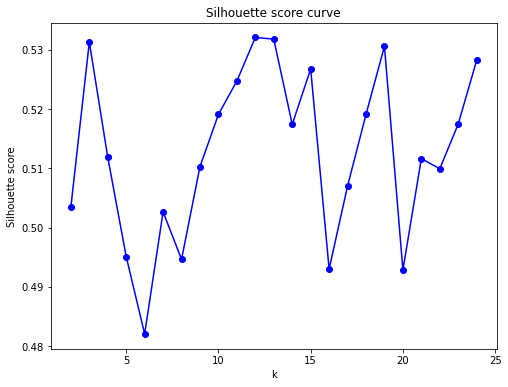

In [147]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,25),cost[2:25],"bo-")
ax.set_xlabel('k')
ax.set_ylabel('Silhouette score')
ax.set_title("Silhouette score curve")
plt.savefig("Silhouette score curve_c3.png")

In [148]:
k = cost.argmax()
print("best k for clustering: ", k)
kmeans = KMeans(initMode='k-means||').setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

best k for clustering:  12
Cluster Centers: 
[24.01666677 27.32222225]
[13.20200012 17.59400002]
[27.4673913  7.7086957]
[14.94318177 25.54772732]
[15.67624998 11.82875001]
[23.07249999 14.42874994]
[ 5.31666666 14.404762  ]
[29.23620684 18.80862065]
[20.17777782 20.94629627]
[ 8.21304347 22.03913042]
[10.28333322  7.6541667 ]
[19.03478253  5.22173915]


In [153]:
T=[]
# k = cost.argmax()
print("best k for clustering: ", k)

num_cores= [ 1,2,3,4]
for i in num_cores:
    
    conf = SparkConf()
    conf.setMaster(f"local[{i}]").setAppName("word-counts")   # set the number of cores
    sc = SparkContext.getOrCreate(conf=conf) #The spark context object is assigned to a variable sc.
    print(conf.getAll())

    t = time.time()
    kmeans = KMeans(initMode='k-means||').setK(k).setFeaturesCol("features")
    model = kmeans.fit(df_kmeans)
    # centers = model.clusterCenters()
    print(time.time() - t)
    T.append(time.time() - t)

# print("Cluster Centers: ")
# for center in centers:
#     print(center)

best k for clustering:  12
[('spark.app.submitTime', '1672647824991'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true'), ('spark.master', 'local[1]')]
0.9916925430297852
[('spark.app.submitTime', '1672647824991'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true'), ('spark.master', 'local[2]')]
0.8872172832489014
[('spark.app.submitTime', '1672647824991'), ('spark.master', 'local[3]'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true')]
0.8752856254577637
[('spark.app.submitTime', '1672647824991'), ('spark.master', 'local[4]'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true')]
0.8751497268676758


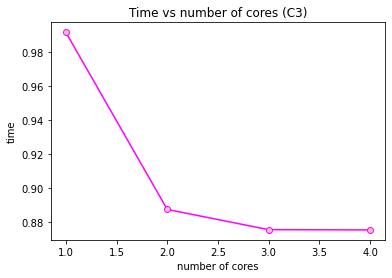

In [156]:
import matplotlib.pyplot as plt

plt.plot(num_cores,T, color='magenta', marker='o',mfc='pink' ) #plot the data

plt.ylabel('time') #set the label for y axis
plt.xlabel('number of cores') #set the label for x-axis
plt.title("Time vs number of cores (C3)") #set the title of the graph
plt.show() #display the graph
# plt.savefig("Time vs number of cores_C3.png")


# BisectingKMeans

In [141]:
from pyspark.ml.evaluation import ClusteringEvaluator
cost = np.zeros(25)
for k in range(2,25):
    bkm = BisectingKMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = bkm.fit(df_kmeans)

    pdt = model.transform(df_kmeans)
    evaluator = ClusteringEvaluator()
    cost[k] = evaluator.evaluate(pdt) #Silhouette with squared euclidean distance
    

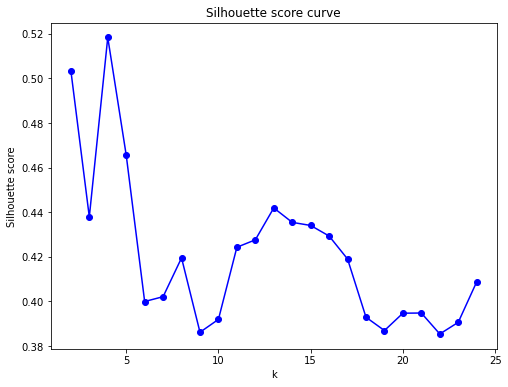

In [142]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,25),cost[2:25],"bo-")
ax.set_xlabel('k')
ax.set_ylabel('Silhouette score')
ax.set_title("Silhouette score curve")
plt.savefig("Silhouette score curve BisectingKMeans_c3.png")

In [143]:
k = cost.argmax()
print("best k for clustering: ", k)
bkm = BisectingKMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = bkm.fit(df_kmeans)
centers = model.clusterCenters()

print("Cluster Centers: ")
for center in centers:
    print(center)

best k for clustering:  4
Cluster Centers: 
[11.21097562 20.62743903]
[13.73421049 10.08750003]
[24.96728388 11.42160492]
[24.08082202 23.51095892]


In [144]:
T=[]
# k = cost.argmax()
print("best k for clustering: ", k)

num_cores= [ 1,2,3,4]
for i in num_cores:
    
    conf = SparkConf()
    conf.setMaster(f"local[{i}]").setAppName("word-counts")   # set the number of cores
    sc = SparkContext.getOrCreate(conf=conf) #The spark context object is assigned to a variable sc.
    print(conf.getAll())

    t = time.time()
    bkm = BisectingKMeans().setK(k).setSeed(1).setFeaturesCol("features")
    model = bkm.fit(df_kmeans)
    # centers = model.clusterCenters()
    print(time.time() - t)
    T.append(time.time() - t)

# print("Cluster Centers: ")
# for center in centers:
#     print(center)

best k for clustering:  4
[('spark.app.submitTime', '1672647824991'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true'), ('spark.master', 'local[1]')]
1.6260912418365479
[('spark.app.submitTime', '1672647824991'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true'), ('spark.master', 'local[2]')]
1.4269227981567383
[('spark.app.submitTime', '1672647824991'), ('spark.master', 'local[3]'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true')]
1.3393959999084473
[('spark.app.submitTime', '1672647824991'), ('spark.master', 'local[4]'), ('spark.app.name', 'word-counts'), ('spark.submit.pyFiles', ''), ('spark.submit.deployMode', 'client'), ('spark.ui.showConsoleProgress', 'true')]
1.3793001174926758


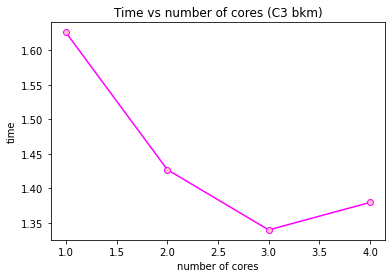

<Figure size 432x288 with 0 Axes>

In [145]:
import matplotlib.pyplot as plt

plt.plot(num_cores,T, color='magenta', marker='o',mfc='pink' ) #plot the data

plt.ylabel('time') #set the label for y axis
plt.xlabel('number of cores') #set the label for x-axis
plt.title("Time vs number of cores (C3 bkm)") #set the title of the graph
plt.show() #display the graph
# plt.savefig("Time vs number of cores_C3_bkm.png")
